<a href="https://colab.research.google.com/github/AlePeraDev/Challenge_Data_Science_1/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



La facturación de la tienda 1 es: $1,150,880,400M
La facturación de la tienda 2 es: $1,116,343,500M
La facturación de la tienda 3 es: $1,098,019,600M
La facturación de la tienda 4 es: $1,038,375,700M


<function matplotlib.pyplot.show(close=None, block=None)>

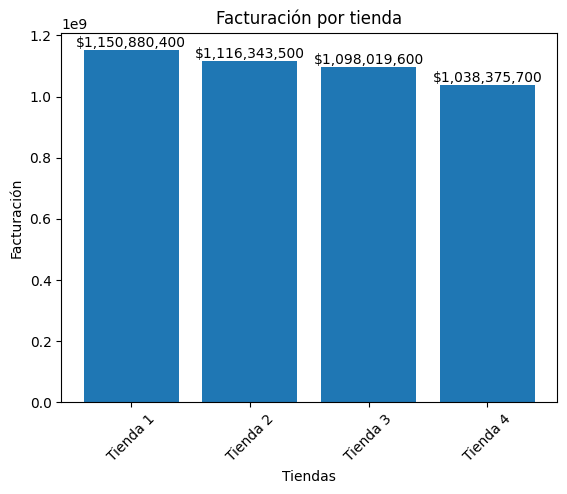

In [30]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

def leer_csv(url):
  datos = []
  with urlopen(url) as respuesta:
    lienas = respuesta.read().decode('utf-8').splitlines()
    lector = csv.DirectReader(lineas)
    for fila in lector:
        datos.append(fila)
  return datos


#Sumatoría de la facturación correspondiente a cada tienda


facturacion_tienda1 = tienda["Precio"].astype(float).sum()
facturacion_tienda2 = tienda2["Precio"].astype(float).sum()
facturacion_tienda3 = tienda3["Precio"].astype(float).sum()
facturacion_tienda4 = tienda4["Precio"].astype(float).sum()

print(f"La facturación de la tienda 1 es: ${facturacion_tienda1:,.0f}M")
print(f"La facturación de la tienda 2 es: ${facturacion_tienda2:,.0f}M")
print(f"La facturación de la tienda 3 es: ${facturacion_tienda3:,.0f}M")
print(f"La facturación de la tienda 4 es: ${facturacion_tienda4:,.0f}M")



tiendas = ("Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4")
facturacion = (facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4)

plt.bar(x= tiendas, height=facturacion)
plt.xticks(rotation=45)
plt.title("Facturación por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Facturación")

for i in range(len(tiendas)):
    plt.text(i, facturacion[i], f"${facturacion[i]:,.0f}", ha="center", va="bottom")
plt.show



# 2. Ventas por categoría

In [31]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        # Decodificar los datos
        lineas = respuesta.read().decode('utf-8').splitlines()
        reader = csv.DictReader(lineas)
        for fila in reader:
            datos.append(fila)
    return datos

ventas_por_categoria = {}
resumen = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

ventas_por_categoria['tienda1'] = resumen

for tienda, resumen in ventas_por_categoria.items():
  print(f'tienda1')
  print(resumen)


tienda1
Categoría del Producto
Electrónicos               429493500.0
Electrodomésticos          363685200.0
Muebles                    187633700.0
Instrumentos musicales      91299000.0
Deportes y diversión        39290000.0
Juguetes                    17995700.0
Artículos para el hogar     12698400.0
Libros                       8784900.0
Name: Precio, dtype: float64


list

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda